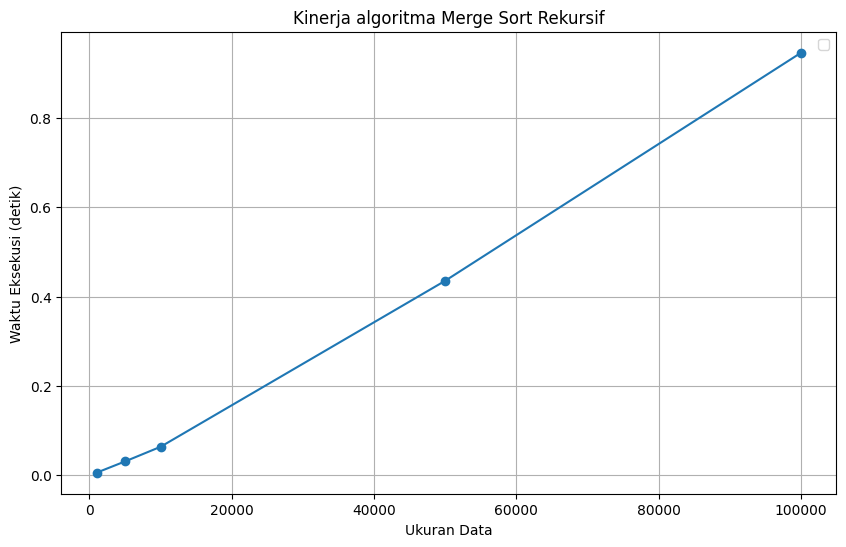

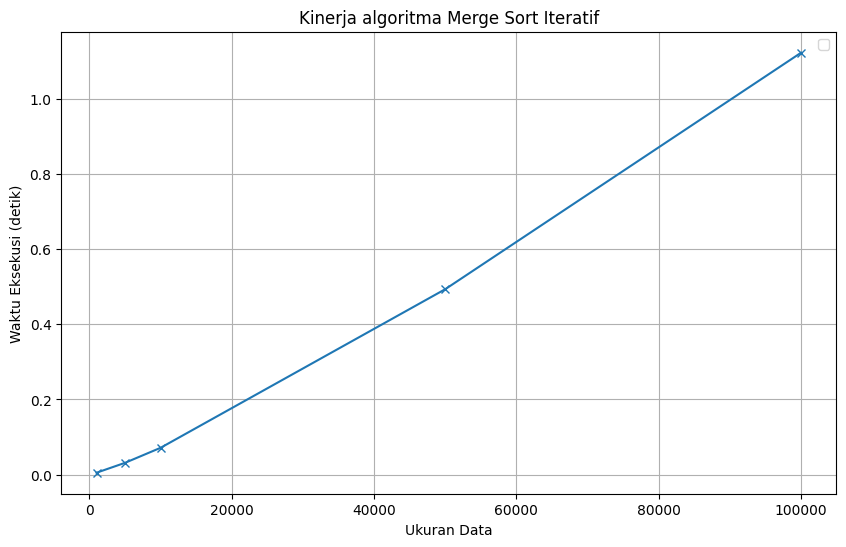

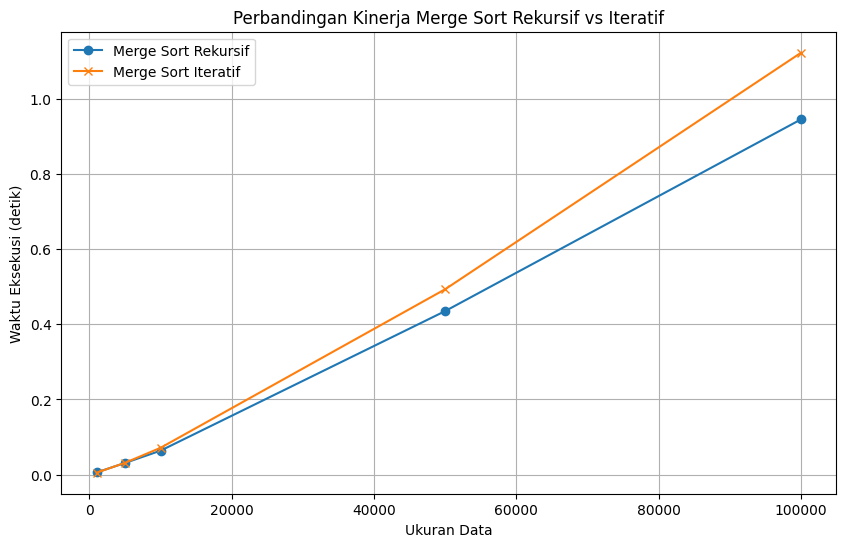


Hasil Pengukuran Waktu:
Ukuran Data | Rekursif (detik) | Iteratif (detik)
--------------------------------------------------
      1000 |         0.0055 |         0.0048
      5000 |         0.0307 |         0.0311
     10000 |         0.0635 |         0.0711
     50000 |         0.4353 |         0.4934
    100000 |         0.9458 |         1.1231


In [ ]:
import random
import time
import matplotlib.pyplot as plt

class Product:
    def __init__(self, id, name, price, popularity):
        self.id = id
        self.name = name
        self.price = price
        self.popularity = popularity

    def __repr__(self):
        return f"Product(id={self.id}, name={self.name}, price={self.price}, popularity={self.popularity})"

def generate_product_data(n):
    """Generate sample product data"""
    products = []
    for i in range(n):
        products.append(Product(
            id=i,
            name=f"Product {i}",
            price=random.uniform(10, 1000),
            popularity=random.randint(1, 100)
        ))
    return products

def merge_recursive(arr, left, mid, right, key='price'):
    """Merge function for recursive merge sort"""
    left_half = arr[left:mid+1]
    right_half = arr[mid+1:right+1]

    i = j = 0
    k = left

    while i < len(left_half) and j < len(right_half):
        if getattr(left_half[i], key) <= getattr(right_half[j], key):
            arr[k] = left_half[i]
            i += 1
        else:
            arr[k] = right_half[j]
            j += 1
        k += 1

    while i < len(left_half):
        arr[k] = left_half[i]
        i += 1
        k += 1

    while j < len(right_half):
        arr[k] = right_half[j]
        j += 1
        k += 1

def merge_sort_recursive(arr, left, right, key='price'):
    """Recursive Merge Sort"""
    if left < right:
        mid = (left + right) // 2

        # Rekursif di sisi kiri
        merge_sort_recursive(arr, left, mid, key)

        # Rekursif di sisi kanan
        merge_sort_recursive(arr, mid+1, right, key)

        # Menggabungkan kedua bagian
        merge_recursive(arr, left, mid, right, key)

def merge_sort_iterative(arr, key='price'):
    """Iterative Merge Sort"""
    n = len(arr)
    # Iterasi dengan ukuran subarray yang bertambah
    size = 1
    while size < n:
        # Iterasi untuk menggabungkan subarray
        for left_start in range(0, n, 2*size):
            # Tentukan batas-batas subarray
            mid = min(left_start + size - 1, n-1)
            right_end = min(left_start + 2*size - 1, n-1)

            # Gabungkan subarray
            merge_recursive(arr, left_start, mid, right_end, key)

        # Naikkan ukuran subarray
        size *= 2

def measure_sorting_time(sort_func, data, key='price'):
    """Mengukur waktu eksekusi sorting"""
    # Salin data agar tidak memodifikasi data asli
    data_copy = data.copy()

    # Ukur waktu
    start_time = time.time()
    sort_func(data_copy, key)
    end_time = time.time()

    return end_time - start_time

def compare_sorting_algorithms(data_sizes):
    """Membandingkan kinerja algoritma sorting"""
    recursive_times = []
    iterative_times = []

    for size in data_sizes:
        # Generate data
        products = generate_product_data(size)

        # Ukur waktu Merge Sort Rekursif
        recursive_time = measure_sorting_time(
            lambda arr, key: merge_sort_recursive(arr, 0, len(arr)-1, key),
            products
        )
        recursive_times.append(recursive_time)

        # Ukur waktu Merge Sort Iteratif
        iterative_time = measure_sorting_time(merge_sort_iterative, products)
        iterative_times.append(iterative_time)

    # Plot hasil rekursif
    plt.figure(figsize=(10, 6))
    plt.plot(data_sizes, recursive_times, label='', marker='o')
    plt.xlabel('Ukuran Data')
    plt.ylabel('Waktu Eksekusi (detik)')
    plt.title('Kinerja algoritma Merge Sort Rekursif')
    plt.legend()
    plt.grid(True)
    plt.show()
    print('')
    print('')

    # Plot hasil algoritma iteratif
    plt.figure(figsize=(10, 6))
    plt.plot(data_sizes, iterative_times, label='', marker='x')
    plt.xlabel('Ukuran Data')
    plt.ylabel('Waktu Eksekusi (detik)')
    plt.title('Kinerja algoritma Merge Sort Iteratif')
    plt.legend()
    plt.grid(True)
    plt.show()
    print('')
    print('')

    # Plot hasil perpandingan
    plt.figure(figsize=(10, 6))
    plt.plot(data_sizes, recursive_times, label='Merge Sort Rekursif', marker='o')
    plt.plot(data_sizes, iterative_times, label='Merge Sort Iteratif', marker='x')
    plt.xlabel('Ukuran Data')
    plt.ylabel('Waktu Eksekusi (detik)')
    plt.title('Perbandingan Kinerja Merge Sort Rekursif vs Iteratif')
    plt.legend()
    plt.grid(True)
    plt.show()

    return recursive_times, iterative_times

# Jalankan perbandingan
data_sizes = [1000, 5000, 10000, 50000, 100000]
recursive_times, iterative_times = compare_sorting_algorithms(data_sizes)

# Cetak hasil
print("\nHasil Pengukuran Waktu:")
print("Ukuran Data | Rekursif (detik) | Iteratif (detik)")
print("-" * 50)
for i, size in enumerate(data_sizes):
    print(f"{size:10} | {recursive_times[i]:14.4f} | {iterative_times[i]:14.4f}")